### Step1 - Data Description and Objective.
- In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. 
- In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
- The data consists matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.
- `The objective is to create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place)`.

### Importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform

### Step2 - Reading .csv file.

In [2]:
df = pd.read_csv("C:\\Users\\saisr\\Downloads\\data.csv")

### Step3 - Performing head, shape and description of the dataframe. 

- Head of the dataframe.

In [3]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


- Shape of the Dataframe.

In [4]:
df.shape

(1111742, 30)

- Statistical Description of the dataframe.

In [5]:
df.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [6]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### Observation:
We can see that there is one missing value present in the data for column regarding `winPlacePerc`. So, there is a necessity we have to fill the missing value with some value.

### Step4 - Data Cleaning.

In [7]:
df['winPlacePerc'].fillna(df['winPlacePerc'].mean(), inplace = True)

In [8]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Observation
We can see there are no missing values present in the dataset after data cleaning.

### Dropping Unnecessary Columns.

In [9]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)
df.drop(['Id'],axis=1,inplace = True)
df.drop(['groupId'],axis=1,inplace = True)
df.drop(['matchId'],axis=1,inplace = True)

In [10]:
df.head(2)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.0,0,0,151.3,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.0,0,0,1918.0,7,1516,0.5862


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 26 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   assists          1111742 non-null  int64  
 1   boosts           1111742 non-null  int64  
 2   damageDealt      1111742 non-null  float64
 3   DBNOs            1111742 non-null  int64  
 4   headshotKills    1111742 non-null  int64  
 5   heals            1111742 non-null  int64  
 6   killPlace        1111742 non-null  int64  
 7   killPoints       1111742 non-null  int64  
 8   kills            1111742 non-null  int64  
 9   killStreaks      1111742 non-null  int64  
 10  longestKill      1111742 non-null  float64
 11  matchDuration    1111742 non-null  int64  
 12  matchType        1111742 non-null  object 
 13  maxPlace         1111742 non-null  int64  
 14  numGroups        1111742 non-null  int64  
 15  rankPoints       1111742 non-null  int64  
 16  revives          1

### Step5 - Univariate Analysis.

### 1) Finding the outliers in each numerical column.

- Outliers - Outlier is an observation that is numerically distant from the rest of the data or in a simple word it is the value which is out of the range or it has extremely high or low values.

`DIFFERENT OUTLIER DETECTION TECHNIQUES:`
- Z-Score.
- IQR.
- Visualization Methods.
- Hypothesis Testing.

##### a) Z-Score  
- Using Z-Score method, we can find out the `distance of a point from the mean with respect to standard deviation.`  
`Z score = (Observation — Mean)/Standard Deviation`    
`Z* or Z-Score = (X — μ) / σ`  

- Number of Outliers present for different columns regarding float datatype.

In [12]:
num_cols = [col for col in df.columns if df[col].dtypes == 'float64']
num_cols
def zscore_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    threshold = 3
    outlier = [] 
    for i in df[col]: 
        z = (i-mean)/std
        if z > threshold: 
            outlier.append(i)
    print('Column name is :',col)
    print('Number of outliers in dataset is', len(outlier))
    return '*****************************************************'
for i in num_cols:
    print(zscore_outlier(df,i))

Column name is : damageDealt
Number of outliers in dataset is 21288
*****************************************************
Column name is : longestKill
Number of outliers in dataset is 29011
*****************************************************
Column name is : rideDistance
Number of outliers in dataset is 33013
*****************************************************
Column name is : swimDistance
Number of outliers in dataset is 15830
*****************************************************
Column name is : walkDistance
Number of outliers in dataset is 6795
*****************************************************
Column name is : winPlacePerc
Number of outliers in dataset is 0
*****************************************************


#### Observation  
The above program gives you the number of outliers for columns representing float datatype.

- Number of outliers present in different columns regarding integer datatype.

In [13]:
num_cols = [col for col in df.columns if df[col].dtypes == 'int64']
num_cols
def zscore_outlier(df,col):
    mean = df[col].mean()
    std = df[col].std()
    threshold = 3
    outlier = [] 
    for i in df[col]: 
        z = (i-mean)/std
        if z > threshold: 
            outlier.append(i)
    print('Column name is :',col)
    print('Number of outliers in dataset is', len(outlier))
    return '*****************************************************'
for i in num_cols:
    print(zscore_outlier(df,i))

Column name is : assists
Number of outliers in dataset is 12552
*****************************************************
Column name is : boosts
Number of outliers in dataset is 17906
*****************************************************
Column name is : DBNOs
Number of outliers in dataset is 15802
*****************************************************
Column name is : headshotKills
Number of outliers in dataset is 12273
*****************************************************
Column name is : heals
Number of outliers in dataset is 25219
*****************************************************
Column name is : killPlace
Number of outliers in dataset is 0
*****************************************************
Column name is : killPoints
Number of outliers in dataset is 0
*****************************************************
Column name is : kills
Number of outliers in dataset is 23235
*****************************************************
Column name is : killStreaks
Number of outliers in dataset i

#### Observation  
The above program gives you the number of outliers for columns representing integer datatype.

#### b) Using IQR

- In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR are treated as outliers.

- Q1 represents the 1st quartile/25th percentile of the data.  
  Q2 represents the 2nd quartile/median/50th percentile of the data.  
  Q3 represents the 3rd quartile/75th percentile of the data.  
  (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represent the largest value in the data set.

- Detecting Outliers using IQR method for integer datatype.

In [14]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Variable name is :',col)
    print('IQR is ',IQR)
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
    print('Lower_Bound',l_bound)
    print('Upper_Bound',u_bound)
    outlier = [val for val in df[col] if val < l_bound or val > u_bound]
    print('number  of Outliers are :',len(outlier))
    return '***************************************************************'
for i in num_cols:
    print(outliers(df,i))

Variable name is : assists
IQR is  0.0
Lower_Bound 0.0
Upper_Bound 0.0
number  of Outliers are : 194611
***************************************************************
Variable name is : boosts
IQR is  2.0
Lower_Bound -3.0
Upper_Bound 5.0
number  of Outliers are : 35533
***************************************************************
Variable name is : DBNOs
IQR is  1.0
Lower_Bound -1.5
Upper_Bound 2.5
number  of Outliers are : 73607
***************************************************************
Variable name is : headshotKills
IQR is  0.0
Lower_Bound 0.0
Upper_Bound 0.0
number  of Outliers are : 187930
***************************************************************
Variable name is : heals
IQR is  2.0
Lower_Bound -3.0
Upper_Bound 5.0
number  of Outliers are : 81625
***************************************************************
Variable name is : killPlace
IQR is  47.0
Lower_Bound -46.5
Upper_Bound 141.5
number  of Outliers are : 0
*****************************************************

### Observation  
Any value outside the lower bound and upper bound for columns regarding integer datatype are called as Outliers.

- Detecting Outliers using IQR method for integer datatype.

In [15]:
num_cols = [col for col in df.columns if df[col].dtypes == 'float64']
num_cols
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('Variable name is :',col)
    print('IQR is ',IQR)
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
    print('Lower_Bound',l_bound)
    print('Upper_Bound',u_bound)
    outlier = [val for val in df[col] if val < l_bound or val > u_bound]
    #print('Outliers are :',outlier)
    print('number  of Outliers are :',len(outlier))
    return '***************************************************************'
for i in num_cols:
    print(outliers(df,i))

Variable name is : damageDealt
IQR is  185.9
Lower_Bound -278.85
Upper_Bound 464.75
number  of Outliers are : 54026
***************************************************************
Variable name is : longestKill
IQR is  21.33
Lower_Bound -31.994999999999997
Upper_Bound 53.324999999999996
number  of Outliers are : 153335
***************************************************************
Variable name is : rideDistance
IQR is  0.079275
Lower_Bound -0.1189125
Upper_Bound 0.19818750000000002
number  of Outliers are : 277645
***************************************************************
Variable name is : swimDistance
IQR is  0.0
Lower_Bound 0.0
Upper_Bound 0.0
number  of Outliers are : 72617
***************************************************************
Variable name is : walkDistance
IQR is  1819.8
Lower_Bound -2574.5
Upper_Bound 4704.7
number  of Outliers are : 6757
***************************************************************
Variable name is : winPlacePerc
IQR is  0.5407
Lower_Bound -0

### Observation  
Any value outside the lower bound and upper bound for columns regarding float datatype are called as Outliers.

### IQR for all the numerical columns.

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

assists               0.000000
boosts                2.000000
damageDealt         185.900000
DBNOs                 1.000000
headshotKills         0.000000
heals                 2.000000
killPlace            47.000000
killPoints         1171.000000
kills                 1.000000
killStreaks           1.000000
longestKill          21.330000
matchDuration       484.000000
maxPlace             21.000000
numGroups            20.000000
rankPoints         1501.000000
revives               0.000000
rideDistance          0.079275
roadKills             0.000000
swimDistance          0.000000
teamKills             0.000000
vehicleDestroys       0.000000
walkDistance       1819.800000
weaponsAcquired       3.000000
winPoints          1495.000000
winPlacePerc          0.540700
dtype: float64


##### c) Visualizing the data.
- Data visualization is useful for data cleaning, data exploration, detecting outliers, identifying trends and clusters etc.  
`The list of data visualization plots to spot the outliers:`  
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot.

In [17]:
import warnings
warnings.filterwarnings("ignore")

### Probability and Frequency Distribution for each numerical column.

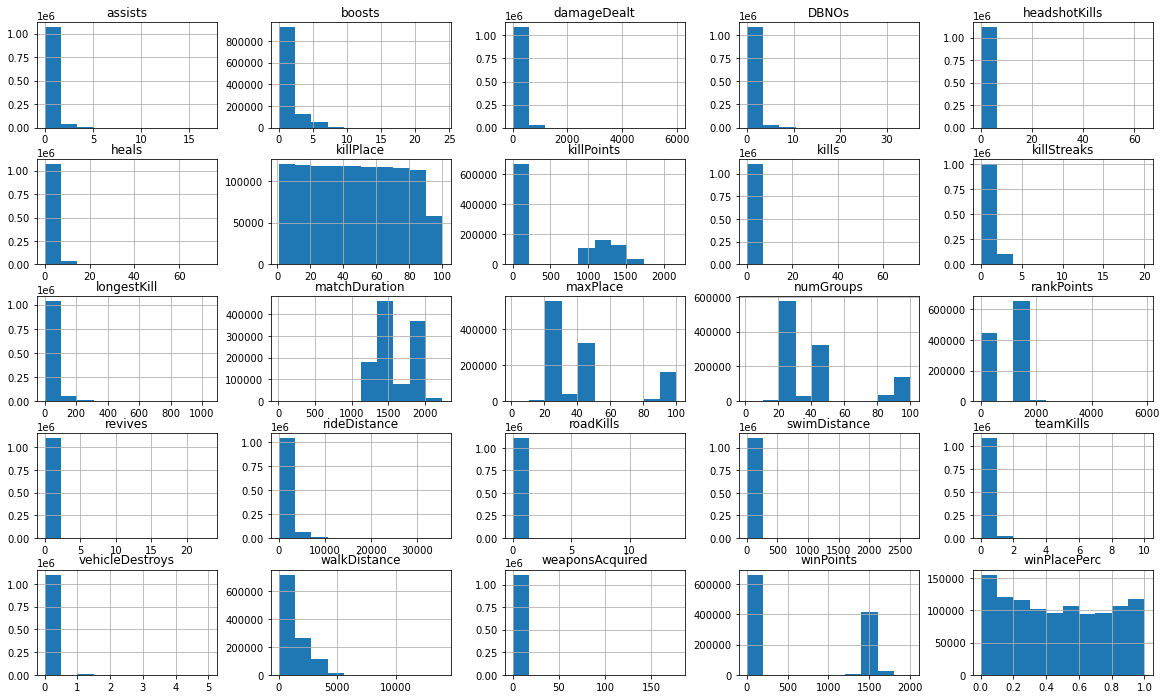

In [18]:
numerical_columns = df.select_dtypes(include=['int64','float64'])
numerical_columns.hist(figsize = (20,12))
plt.show()

### Observation  
From the above plot we can see the probability and frequency distribution of each numerical plot.

- assists - `Number of enemy players this player damaged that were killed by teammates`.

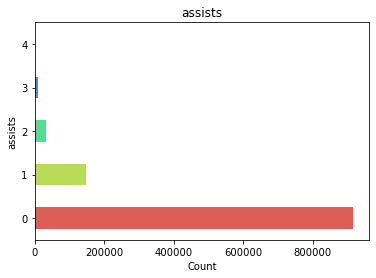

In [19]:
# probability and frequency using barplot.
df['assists'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("assists")
plt.xlabel("Count")
plt.title("assists")
plt.show()

### Observation
As we all know that assists in PUBG means number of enemy players this player damaged that were killed by teammates. By this distribution we can say that most of them did not damaged the players that were killed by teammates.

- boosts - `Number of boost items used`.

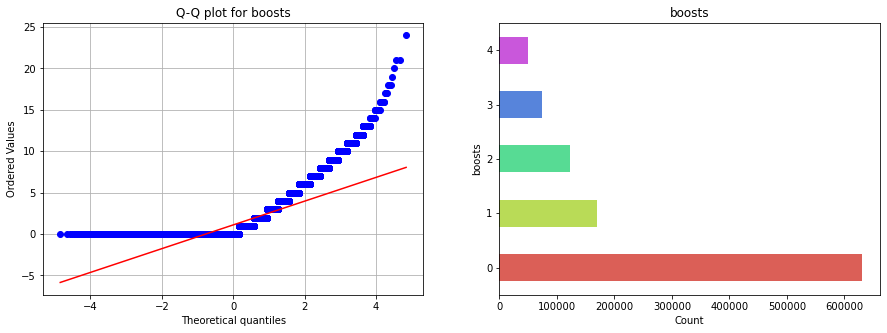

In [20]:
# Q-Qplot for boosts.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['boosts'], dist="norm", plot=plt)
plt.title("Q-Q plot for boosts")
plt.grid()

# Barplot for boosts.
plt.subplot(122)
df['boosts'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("boosts")
plt.xlabel("Count")
plt.title("boosts")
plt.show()

### Observation  
- From Q-Q plot for boosts, we can say that there is a lot of discrepancy in the plot, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot, we can say that most of them have not used boosts items.

- DamageDealt - `Total damage dealt`

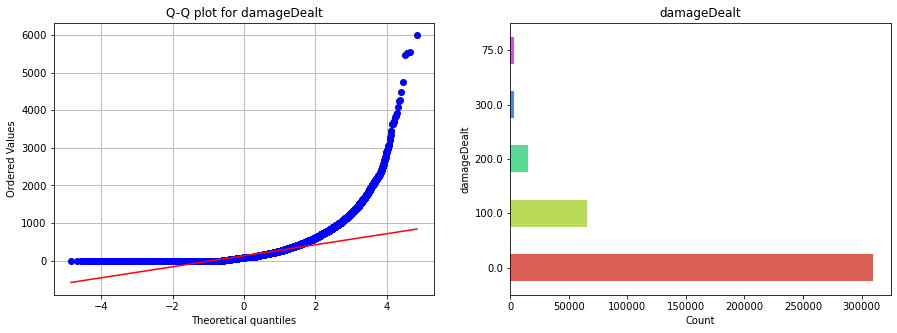

In [21]:
# Q-Qplot for damageDealt.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['damageDealt'], dist="norm", plot=plt)
plt.title("Q-Q plot for damageDealt")
plt.grid()

# Barplot for damageDealt.
plt.subplot(122)
df['damageDealt'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("damageDealt")
plt.xlabel("Count")
plt.title("damageDealt")
plt.show()

### Observation  
- From Q-Q plot for Damagedealt, we can say that there is a lot of discrepancy in the plot, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot, we can say that most of them have damagedealt as zero as self inflicted damage is subtracted.

- DBNOs - `Number of enemy players knocked.`

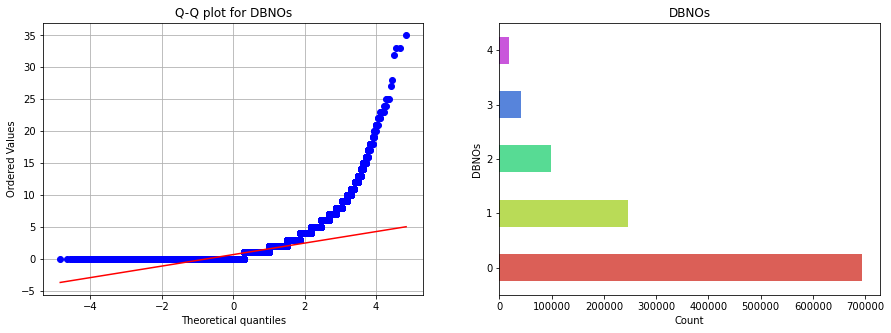

In [22]:
# Q-Qplot for DBNOs.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['DBNOs'], dist="norm", plot=plt)
plt.title("Q-Q plot for DBNOs")
plt.grid()

# Barplot for DBNOs.
plt.subplot(122)
df['DBNOs'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("DBNOs")
plt.xlabel("Count")
plt.title("DBNOs")
plt.show()

### Observation  
- From Q-Q plot for DBNOs, we can say that there is a lot of discrepancy in the plot, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot, we can say that most of them have DBNOs(Number of enemy players knocked) as zero.

- headshotKills -  `Number of enemy players killed with headshots`.

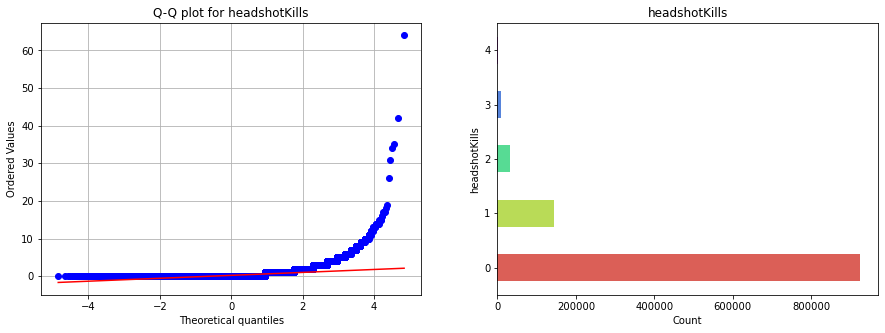

In [23]:
# Q-Qplot for headshotKills.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['headshotKills'], dist="norm", plot=plt)
plt.title("Q-Q plot for headshotKills")
plt.grid()

# Barplot for headshotKills.
plt.subplot(122)
df['headshotKills'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("headshotKills")
plt.xlabel("Count")
plt.title("headshotKills")
plt.show()

### Observation  
- From Q-Q plot for headshotkills, we can say that there is a lot of discrepancy in the data, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot, we can say that most of them have headshotkills as zero.

- heals - `Number of healing items used`.

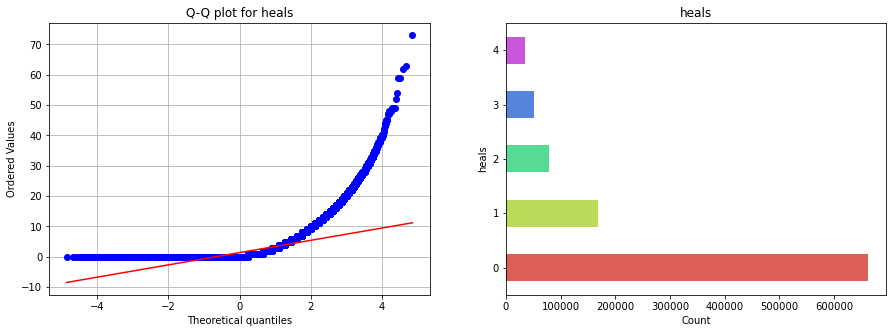

In [24]:
# Q-Qplot for heals.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['heals'], dist="norm", plot=plt)
plt.title("Q-Q plot for heals")
plt.grid()

# Barplot for heals.
plt.subplot(122)
df['heals'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("heals")
plt.xlabel("Count")
plt.title("heals")
plt.show()

### Observation  
- From Q-Q plot, we can say that there is a lot of discrepancy in the data, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot, we can say that most of them used healing items as zero.

- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there   is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a     player and driving away may lead to a large longestKill stat.

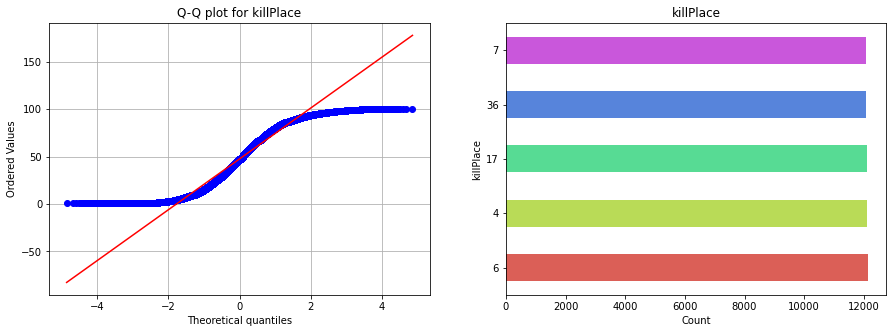

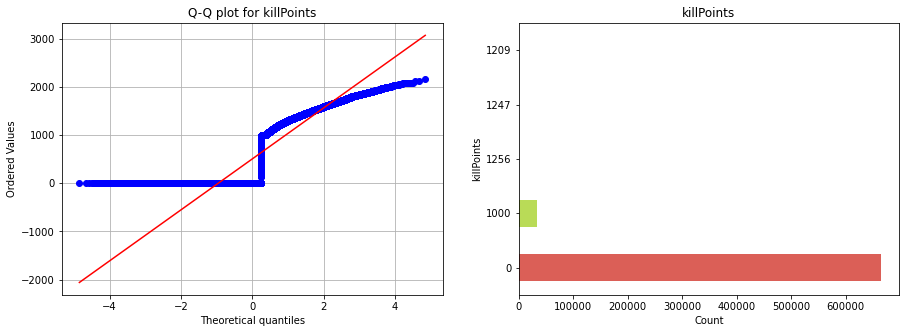

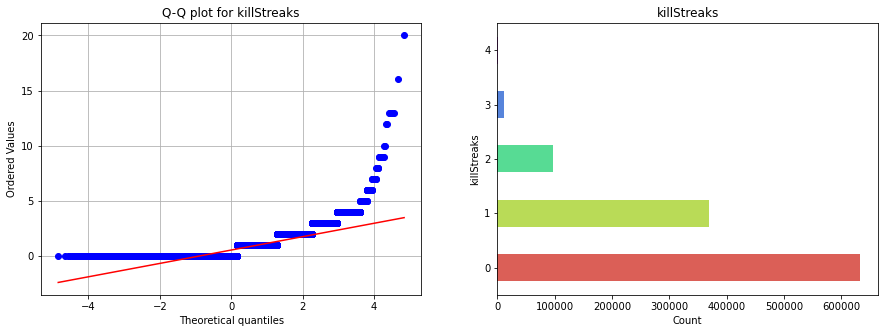

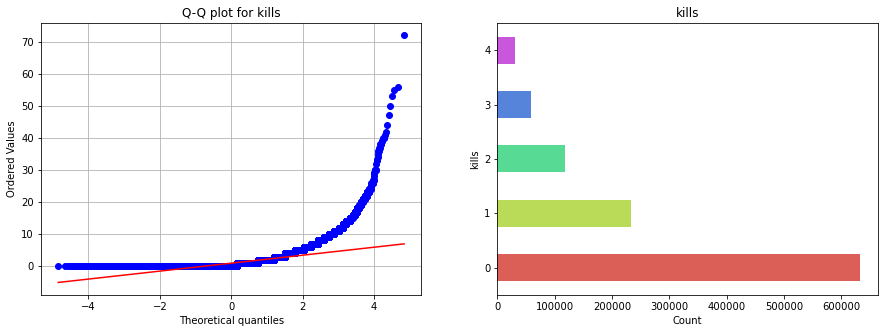

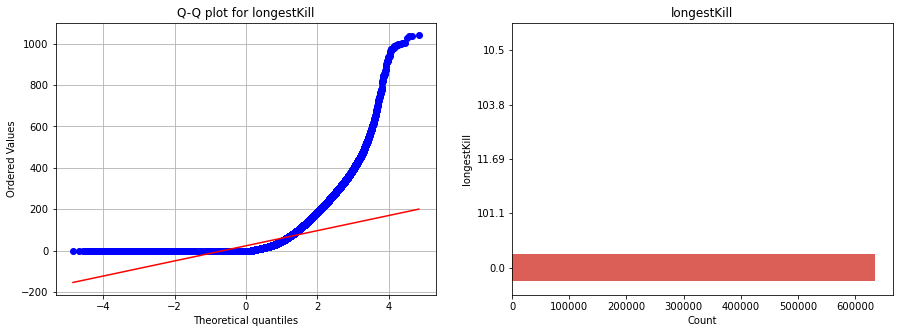

In [25]:
# Q-Qplot for killPlace.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['killPlace'], dist="norm", plot=plt)
plt.title("Q-Q plot for killPlace")
plt.grid()
# Barplot for killPlace.
plt.subplot(122)
df['killPlace'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("killPlace")
plt.xlabel("Count")
plt.title("killPlace")
plt.show()

# Q-Qplot for killPoints.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['killPoints'], dist="norm", plot=plt)
plt.title("Q-Q plot for killPoints")
plt.grid()
# Barplot for killPoints.
plt.subplot(122)
df['killPoints'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("killPoints")
plt.xlabel("Count")
plt.title("killPoints")
plt.show()

# Q-Qplot for killStreaks.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['killStreaks'], dist="norm", plot=plt)
plt.title("Q-Q plot for killStreaks")
plt.grid()
# Barplot for killStreaks.
plt.subplot(122)
df['killStreaks'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("killStreaks")
plt.xlabel("Count")
plt.title("killStreaks")
plt.show()

# Q-Qplot for kills.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['kills'], dist="norm", plot=plt)
plt.title("Q-Q plot for kills")
plt.grid()
# Barplot for kills.
plt.subplot(122)
df['kills'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("kills")
plt.xlabel("Count")
plt.title("kills")
plt.show()

# Q-Qplot for longestKill.
plt.figure(1,figsize=(15,5))
plt.subplot(121)
stats.probplot(df['longestKill'], dist="norm", plot=plt)
plt.title("Q-Q plot for longestKill")
plt.grid()
# Barplot for longestKill.
plt.subplot(122)
df['longestKill'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("longestKill")
plt.xlabel("Count")
plt.title("longestKill")
plt.show()

### Observation  
- From Q-Q plot, we can say that there is a lot of discrepancy in the data, as it is not normally distributed we can say that there ar outliers in the data.
- From barplot for killplace, we can say that most of them used `4,6,7,17 and 36`.
- From barplot for killpoints, we can say that most of them have no killpoints.
- From barplot for killstreaks, we can say that most of them have no killstreaks.
- From barplot for kills, we can say that most of them have not killed any players.
- From barplot for longestkill, we can say that most of them have distance as 0.

- matchDuration - `Duration of match in seconds`.

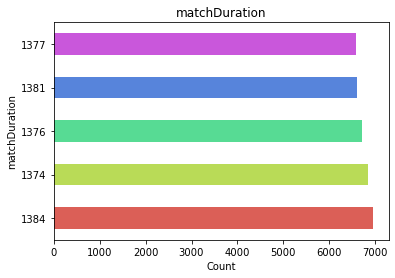

In [26]:
df['matchDuration'].value_counts().head().plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("matchDuration")
plt.xlabel("Count")
plt.title("matchDuration")
plt.show()

### Observation  
From barplot, we can say that most of the matches have played in the duration of `1384,1374,1376,1381,1377` seconds.

- vehicleDestroys - Number of vehicles destroyed.

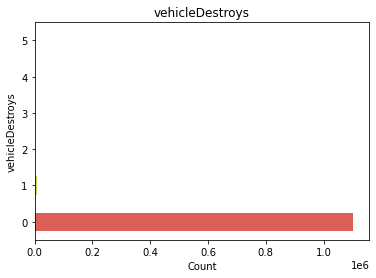

In [27]:
df['vehicleDestroys'].value_counts().head(11).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("vehicleDestroys")
plt.xlabel("Count")
plt.title("vehicleDestroys")
plt.show()

### Observation  
From barplot, we can say that most of them have not destroyed any vehicles.

### Frequency Distribution of Categorical Columns.

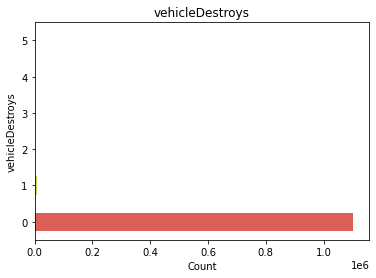

In [28]:
df['vehicleDestroys'].value_counts().head(11).plot(kind = "barh", color = sns.color_palette("hls", 5))
plt.ylabel("vehicleDestroys")
plt.xlabel("Count")
plt.title("vehicleDestroys")
plt.show()

### Step6 - Bivariate Analysis.

#### 1) The relationship between different numerical columns.

In [29]:
cs = pd.pivot_table(df, index =['matchDuration','kills'])
cs.head(10)

DBNOs  assists  boosts  damageDealt  headshotKills  \
matchDuration kills                                                       
9             0        0.0      0.0     0.0         0.00            0.0   
133           0        0.0      0.0     0.0         0.00            0.0   
209           0        0.0      1.0     0.0        36.54            0.0   
              1        1.0      1.0     0.0        44.56            0.0   
              2        1.0      1.0     0.0        94.04            1.0   
246           0        0.5      1.0     1.0        95.99            0.0   
248           0        0.0      0.0     0.0        32.25            0.0   
              1        0.0      0.0     0.0       100.00            0.0   
250           0        0.0      0.0     0.0        17.10            0.0   
              1        0.0      0.0     0.0       168.00            0.0   

                     heals  killPlace  killPoints  killStreaks  longestKill  \
matchDuration kills                                                           
9             0        0.0   1.000000         0.0          0.0        0.000   
133           0        0.0   2.000000         0.0          0.0        0.000   
209           0        0.0  16.000000      1000.0          0.0        0.000   
              1        0.0   9.000000      1000.0          1.0        1.229   
              2        0.0   5.000000      1000.0          2.0        1.142   
246           0        0.5   7.000000      1000.0          0.0        0.000   
248           0        0.0   7.333333      1000.0          0.0        0.000   
              1        0.0   5.000000      1000.0          1.0        1.839   
250           0        0.0  11.000000      1000.0          0.0        0.000   
              1        0.0   6.000000      1000.0          1.0       19.200   

                     ...  revives  rideDistance  roadKills  swimDistance  \
matchDuration kills  ...                                                   
9             0      ...      0.0           0.0        0.0           0.0   
133           0      ...      0.0           0.0        0.0           0.0   
209           0      ...      0.0           0.0        0.0           0.0   
              1      ...      0.0           0.0        0.0           0.0   
              2      ...      0.0           0.0        0.0           0.0   
246           0      ...      0.0           0.0        0.0           0.0   
248           0      ...      0.0           0.0        0.0           0.0   
              1      ...      0.0           0.0        0.0           0.0   
250           0      ...      0.0           0.0        0.0           0.0   
              1      ...      0.0           0.0        0.0           0.0   

                     teamKills  vehicleDestroys  walkDistance  \
matchDuration kills                                             
9             0            0.0              0.0      0.000000   
133           0            0.0              0.0      0.000000   
209           0            0.0              0.0     49.210000   
              1            0.0              0.0     63.640000   
              2            0.0              0.0     50.250000   
246           0            0.0              0.0    212.850000   
248           0            0.0              0.0     96.946667   
              1            0.0              0.0     35.530000   
250           0            0.0              0.0     15.030000   
              1            0.0              0.0     78.990000   

                     weaponsAcquired  winPlacePerc  winPoints  
matchDuration kills                                            
9             0                  0.0      0.472787        0.0  
133           0                  2.0      0.000000        0.0  
209           0                  0.0      0.333300     1500.0  
              1                  0.0      0.111100     1500.0  
              2                  0.0      0.444400     1500.0  
246           0              

### Observation  
From the pivot table we can see that how the match duration is not an important criteria for kills and for any column. 

- revives and matchduration.

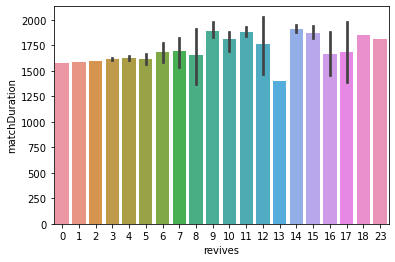

In [30]:
sns.barplot(x='revives', y='matchDuration', data=df)
plt.show()

### Observation  
From the barplot, we can say that most of the revives are taken for match duration above 1750 for revives numbers of 9 and 14.

#### 2) The relationship between categorical and numerical columns.

- winpoints and matchtype

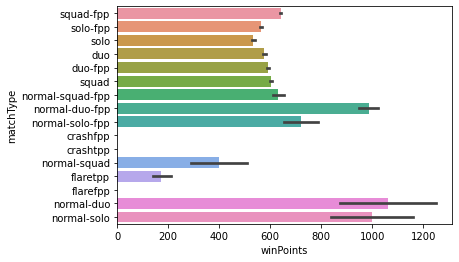

In [31]:
sns.barplot(x='winPoints', y='matchType', data=df)
plt.show()

### Observation  
From the barplot we can say that most of the points have happenend to be in the game of normal-duo and normal-duo-fpp.

- matchtype and Number of the Groups.

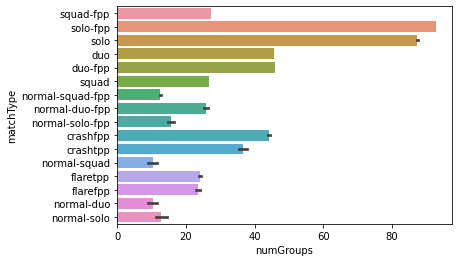

In [32]:
sns.barplot(x='numGroups', y='matchType', data=df)
plt.show()

### Observation  
From the barplot we can say that most of the groups are present in the game of solo-fpp.

### Step7 - Hypothesis Testing.

#### Q) You have developed a new matchtype in PUBG and done a user study. You claim that the it is giving more winning points greater than 3000 than any other matchtype .How do you prove this to your client?

Step - 1:
- Alternate Hypothesis(Bold claim):$$ H_1: \ \mu > 3000 $$ 
- Null Hypothesis(Status Quote):$$ H_0: \ \mu \leq 3000 $$

Step - 2: 
- Collect a sample of size n = 10.$$[1000,2000,3500,4000,6000,5500,700,4000,800,1000]$$
- After computing sample mean, we get $\overline{x}$ as: $$\overline{x} = 2850$$

Step - 3: Compute Test Statistic:
- If population variance is known$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$
- If population variance is unknown: $$ t = \frac{\overline{x} - \mu}{(s/\sqrt[2]{n})}$$

Step - 4: Considered significance level $ \alpha = 0.95 $
- Lower the $ \alpha $ means we need stronger evidence to reject Null Hypothesis($ H_0 $)

Step - 5: Apply Decision Rule
- 5.1 
- If test statistic is z-score
  - Two tailed z-test:$$ |z|> z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0$$
  - Right tailed z-test:$$ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  - Left tailed z-test:$$ z < lt; -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  
- As population variance is not given, we are applying t- test statistic, the conditions of t-test statistics are:
  - Two tailed t-test: $$ |t|>t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  - Right tailed t-test: $$ t>t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
  - Left tailed t-test: $$ t<t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$
 

- 5.2 The another method is by computing p-value P(Test Statistics\$ H_0 $) 
 - For two tailed test:$$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $$
 - For one tailed test:$$ p \ value = (1.0 - cdf(test \ statistic)) $$Now,$$ if (p \ value &lt; \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$

In [33]:
# Importing all the necessary libraries.

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
import statistics

- As population variation is unknown, I will consider t-test and p-value.

In [34]:
# Step2 Computing Sample mean for sample size n = 10 and Sample Standard Deviation.

x = [1000,2000,3500,4000,6000,5500,700,4000,800,1000]
print("Sum of the Observations:",sum(x))
print("Number of Observations:",len(x))
print("Sample Mean =",sum(x)/len(x))
sample_std = np.std(x, ddof=1)
print("Sample Standard Deviation:",sample_std)

Sum of the Observations: 28500
Number of Observations: 10
Sample Mean = 2850.0
Sample Standard Deviation: 2011.2185361118766


In [35]:
# Step3 and Step4 are perfroming one- Tailed Test as Alternate Hypothesis is having greater than symbol,
# considering confidence or significance level as 0.95 and calculating t-critical value.

confidence_level = 0.95
alpha = 1 - confidence_level
t_critical =  t.ppf(1-(alpha),df=9) # one - tailed t-score for 95% Confidence Level
print("Alpha:",alpha)
print("t-critical value:",t_critical)

Alpha: 0.050000000000000044
t-critical value: 1.8331129326536335


In [36]:
# Required data for t-test and p-test.

sample_size = 10
sample_mean = 2850
pop_mean = 3000
sample_std = 2011.2185361118766

In [37]:
#t-score

def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denominator = sample_std / (sample_size**0.5)
    return numerator / denominator
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print("t-score:",t)

t-score: -0.23584789047452925


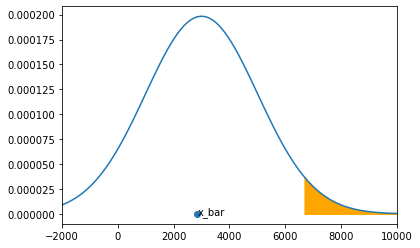

In [38]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = -2000
x_max = 10000

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)

# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0))
plt.show()

In [39]:
# Conclusion using t-test

print("t-score",t)
print("t_critical",t_critical)
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

t-score -0.23584789047452925
t_critical 1.8331129326536335
Fail to reject Null Hypothesis


In [40]:
# Conclusion using p test

p_value = 1.0 - norm.cdf(np.abs(t))

print("p_value = ", p_value)
print("Alpha:",alpha)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.40677535248254193
Alpha: 0.050000000000000044
Fail to reject Null Hypothesis


### Observation  
As Null Hypothesis is rejected in both t-test and p-test then consider Alternate Hypothesis.

### Step8 - Feature Transformation
- Feature transformation involves mapping a set of values for the feature to a new set of values to make the representation of the data more suitable or easier to process for the downstream analysis. A common feature transformation operation is scaling. This involves changing the range of values for a feature of features to another specified range. This is done to avoid allowing features with large values to dominate the analysis results.

- There is a general process for preparing your data for Machine Learning.Part of this process includes data transformations like scaling and/or standardization. Very generally, Machine Learning models may perform better when feature distributions are approximately normal and when feature scales are similar.

- Among all the different methods of feature transformation and scaling techniques, the most used techniques are MinMax Scaler(Data Normalization) and Standard Scaler(Data Standardization).

- For Numerical Features -> Column Standardization

In [41]:
numerical = df.select_dtypes(include=['int64', 'float64'])
numerical.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


#### Data Standardization or Standard Scaler:
- In this process, scaling can be performed by transforming the features such that the results have zero mean, and unit standard deviation.
- The steps to perform the scaling is to first calculate the mean and standard deviation values for the feature to be scaled. Then for each value, for this feature, subtract the mean value from that value, and divide by the standard deviation.
- The transformed feature will end up with a mean value of zero, and standard deviation of one. This effectively removes the units of the features and converts each future value to number of standard deviations away from the mean.
- This scaling method is used when the min and max values are known. This is also useful when there are outliers which will skew the calculation for the range as the max value is determined by the furthest outlier. This scaling operation is often referred to as zero-normalization or as standardization.

In [42]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(numerical), 
                      columns = numerical.columns)
df_num.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,-0.396459,-0.644885,-0.612275,-0.573602,-0.37566,-0.510596,1.325230,1.486403,-0.592434,-0.764270,...,-0.349005,-0.403900,-0.048084,-0.148442,-0.143015,-0.085198,-0.847136,-1.080380,1.243105,-1.321137
1,-0.396459,-0.644885,-0.549298,-0.573602,-0.37566,-0.510596,0.342348,1.148501,-0.592434,-0.764270,...,-0.349005,-0.403900,-0.048084,-0.148442,-0.143015,-0.085198,0.646539,1.356857,1.230935,0.368971
2,-0.396459,-0.062152,-0.484920,-0.573602,-0.37566,-0.510596,0.087527,-0.804000,-0.592434,-0.764270,...,-0.349005,2.328813,-0.048084,-0.148442,-0.143015,-0.085198,-0.281777,1.356857,-0.819061,1.098694
3,-0.396459,-0.644885,-0.763757,-0.573602,-0.37566,-0.510596,0.305945,1.245728,-0.592434,-0.764270,...,1.776761,-0.403900,-0.048084,-0.148442,-0.143015,-0.085198,-0.942242,-1.486587,1.229583,0.269419
4,-0.396459,0.520582,-0.179561,-0.573602,-0.37566,0.607214,-0.604131,-0.804000,0.047682,0.638446,...,-0.349005,0.210024,-0.048084,-0.148442,-0.143015,-0.085198,0.479983,0.544445,-0.819061,0.553435


- For Categorical -> if more than 2 categories, use dummy variables. Otherwise 
convert the feature to Binary.

#### One Hot Encoding
- One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The categorical value represents the numerical value of the entry in the dataset.
- With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. 0 indicates non existent while 1 indicates existent.

In [43]:
categorical_data = df.select_dtypes(include=['object'])
categorical_data.head()

,matchType
0,squad-fpp
1,squad-fpp
2,solo-fpp
3,squad-fpp
4,solo


In [44]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_cat = pd.DataFrame(encoder.fit_transform(categorical_data), 
                      columns=encoder.get_feature_names(categorical_data.columns))

df_cat.head()

,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
pubg = pd.concat([df_num, df_cat], axis=1)
pubg.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,-0.396459,-0.644885,-0.612275,-0.573602,-0.37566,-0.510596,1.325230,1.486403,-0.592434,-0.764270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.396459,-0.644885,-0.549298,-0.573602,-0.37566,-0.510596,0.342348,1.148501,-0.592434,-0.764270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.396459,-0.062152,-0.484920,-0.573602,-0.37566,-0.510596,0.087527,-0.804000,-0.592434,-0.764270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.396459,-0.644885,-0.763757,-0.573602,-0.37566,-0.510596,0.305945,1.245728,-0.592434,-0.764270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.396459,0.520582,-0.179561,-0.573602,-0.37566,0.607214,-0.604131,-0.804000,0.047682,0.638446,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Step9 - Conclusion  
- From Data Analysis we concluded the following statements:
- As we all know that assists in PUBG means number of enemy players this player damaged that were killed by teammates. By this distribution we can say that most of them did not damaged the players that were killed by teammates.
- From barplot regarding boosts, we can say that most of them have not used boosts items.
- From barplot, we can say that most of them have damagedealt as zero as self inflicted damage is subtracted.
- From barplot, we can say that most of them have DBNOs(Number of enemy players knocked) as zero.
- From barplot, we can say that most of them have headshotkills as zero.
- From barplot, we can say that most of them used healing items as zero.
- From barplot for killplace, we can say that most of them used `4,6,7,17 and 36`.
- From barplot for killpoints, we can say that most of them have no killpoints.
- From barplot for killstreaks, we can say that most of them have no killstreaks.
- From barplot for kills, we can say that most of them have not killed any players.
- From barplot for longestkill, we can say that most of them have distance as 0.
- From barplot, we can say that most of the matches have played in the duration of `1384,1374,1376,1381,1377` seconds.
- From barplot, we can say that most of them have not destroyed any vehicles.
- From the pivot table we can see that how the match duration is not an important criteria for kills and for any column. 
- From the barplot, we can say that most of the revives are taken for match duration above 1750 for revives numbers of 9 and 14.
- From the barplot we can say that most of the points have happenend to be in the game of normal-duo and normal-duo-fpp.
- From Q-Q plot of all the columns, we can see a lot of discrepency which helps us to detect the outliers.
- From Hypothesis Testing using t-test and p-value, the result is it is failing to reject the Null Hypothesis.
- As the objective is to create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place), I have used feature Transformation Techniques. For Numerical Features, I have used column standardization technique and for categorical columns, I considered one hot encoding.